<a href="https://colab.research.google.com/github/AkarisDimitry/SortingMethodsBenchmark/blob/main/SortingMethodsBenchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sorting Algorithms Comparison

Este repositorio contiene una implementación y análisis de varios algoritmos de ordenamiento en Python, incluyendo Bubble Sort, Selection Sort, Insertion Sort, Merge Sort, Quick Sort, Heap Sort, Counting Sort, Radix Sort, Bucket Sort y Tim Sort. El código incluye funciones para visualizar el tiempo de ejecución de cada algoritmo en diferentes tamaños de lista, así como una función para visualizar el progreso de un algoritmo de ordenamiento en tiempo real. El objetivo es proporcionar una herramienta de referencia y análisis para la comparación del rendimiento de diferentes algoritmos de ordenamiento.

## Algoritmos de Ordenamiento

A continuación se describen brevemente los algoritmos de ordenamiento implementados en este repositorio.

1. **Bubble Sort**: Compares and swaps adjacent elements until the list is sorted.
2. **Selection Sort**: Divides the list into a sorted and an unsorted region, and repeatedly selects the smallest element from the unsorted region and moves it to the sorted region.
3. **Insertion Sort**: Builds the sorted list one element at a time by inserting each element into its correct position in the already sorted list.
4. **Merge Sort**: Recursively divides the list into two halves, sorts them, and then merges the sorted halves.
5. **Quick Sort**: Selects a 'pivot' element and partitions the other elements into two sub-arrays based on the pivot, and then sorts the sub-arrays recursively.
6. **Heap Sort**: Builds a heap from the input list and utilizes the properties of the heap to sort the list.
7. **Counting Sort**: Sorts integers by counting the occurrences of each integer in the input list.
8. **Radix Sort**: Sorts integers digit by digit, using Counting Sort as a subroutine.
9. **Bucket Sort**: Divides the interval of sorted values into buckets, sorts each bucket, and gathers the sorted values.
10. **Tim Sort**: A hybrid sorting algorithm derived from Merge Sort and Insertion Sort.

## Comparación del Orden de Complejidad

- **Bubble Sort, Selection Sort, Insertion Sort**: \(O(n^2)\)
- **Merge Sort, Heap Sort, Tim Sort**: \(O(n \log n)\)
- **Quick Sort**: \(O(n^2)\) worst-case, \(O(n \log n)\) average-case
- **Counting Sort**: \(O(n + k)\)
- **Radix Sort**: \(O(nk)\)
- **Bucket Sort**: \(O(n + n^2/k + k)\)

## Dependencias

Este código depende de las siguientes bibliotecas de Python:

- `random`
- `numpy`
- `matplotlib`

## Cómo Ejecutar

1. Clona este repositorio: `git clone https://github.com/yourusername/SortingAlgorithmsComparison.git`
2. Cambia al directorio del repositorio: `cd SortingAlgorithmsComparison`
3. Instala las dependencias: `pip install numpy matplotlib`
4. Ejecuta el código: `python sorting_algorithms.py`

## Contribuciones

Las contribuciones son bienvenidas. Por favor, abre una solicitud de extracción (pull request) con tus cambios.

## Licencia

Este código se encuentra bajo la licencia MIT.

## Contacto

Si tienes preguntas o comentarios, por favor abre un problema en este repositorio.


In [2]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Bubble Sort: compares adjacent elements and swaps them if they are in the wrong order.
# The process is repeated for each element until no swaps are needed, indicating the list is sorted.
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        # flag to optimize the algorithm by breaking the loop if no swaps occur
        swapped = False
        # iterate through the list, comparing adjacent elements and swapping them if needed
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        # if no swaps occurred, the list is already sorted
        if not swapped:
            break
    return arr

# Selection Sort: divides the list into a sorted and an unsorted region.
# Repeatedly selects the smallest (or largest) element from the unsorted region and moves it to the sorted region.
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        # assume the element at index i is the smallest
        min_idx = i
        # iterate through the unsorted region to find the smallest element
        for j in range(i+1, n):
            if arr[min_idx] > arr[j]:
                min_idx = j
        # swap the smallest element with the element at index i
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

# Insertion Sort: builds the sorted list one element at a time.
# Takes each element from the input list and inserts it into its correct position in the already sorted list.
def insertion_sort(arr):
    n = len(arr)
    for i in range(1, n):
        # element to be compared
        key = arr[i]
        # move elements that are greater than the key to one position ahead of their current position
        j = i-1
        while j >=0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        # place the key at its correct position
        arr[j+1] = key
    return arr

# Merge Sort: recursively divides the list into two halves, sorts them, and then merges the sorted halves.
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    # recursively sort the left and right halves
    left = merge_sort(left)
    right = merge_sort(right)
    # merge the sorted halves
    return merge(left, right)

# Helper function to merge two sorted lists
def merge(left, right):
    result = []
    i = j = 0
    # iterate through both lists and append the smaller element to the result
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    # append the remaining elements of the left and right lists (if any)
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# Quick Sort: selects a 'pivot' element and partitions the other elements into two sub-arrays.
# Elements less than the pivot go to the left sub-array and elements greater than the pivot go to the right sub-array.
# The sub-arrays are then sorted recursively.
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    # recursively sort the left, middle, and right sub-arrays
    return quick_sort(left) + middle + quick_sort(right)

# Helper function to heapify a subtree rooted at index i
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2
    # check if the left child exists and is greater than the root
    if l < n and arr[i] < arr[l]:
        largest = l
    # check if the right child exists and is greater than the largest element found so far
    if r < n and arr[largest] < arr[r]:
        largest = r
    # swap the root with the largest element if needed and heapify the affected subtree
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

# Heap Sort: builds a heap from the input list and utilizes the properties of the heap to sort the list.
def heap_sort(arr):
    n = len(arr)
    # build a max heap
    for i in range(n, -1, -1):
        heapify(arr, n, i)
    # extract elements from the heap one by one and heapify the remaining heap
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)
    return arr

# Counting Sort: sorts integers by counting the number of occurrences of each integer in the input list.
# The cumulative sum of the counts is used to determine the position of each integer in the sorted output.
def counting_sort(arr):
    max_val = max(arr)
    min_val = min(arr)
    range_of_elements = max_val - min_val + 1
    count = [0] * range_of_elements
    output = [0] * len(arr)
    # count the occurrences of each element
    for i in range(0, len(arr)):
        count[arr[i]-min_val] += 1
    # calculate the cumulative sum of the counts
    for i in range(1, len(count)):
        count[i] += count[i-1]
    # build the sorted output list
    for i in range(len(arr)-1, -1, -1):
        output[count[arr[i] - min_val] - 1] = arr[i]
        count[arr[i] - min_val] -= 1
    # copy the sorted output back to the original list
    for i in range(0, len(arr)):
        arr[i] = output[i]
    return arr

# Helper function for Radix Sort
def counting_sort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * (n)
    count = [0] * (10)
    # count the occurrences of each digit at the current position
    for i in range(0, n):
        index = (arr[i] // exp)
        count[(index) % 10] += 1
    # calculate the cumulative sum of the counts
    for i in range(1, 10):
        count[i] += count[i-1]
    # build the sorted output list based on the current digit
    i = n-1
    while i >= 0:
        index = (arr[i] // exp)
        output[count[(index) % 10] - 1] = arr[i]
        count[(index) % 10] -= 1
        i -= 1
    # copy the sorted output back to the original list
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]

# Radix Sort: sorts integers digit by digit, from the least significant to the most significant digit.
# Uses Counting Sort as a subroutine to sort based on each digit.
def radix_sort(arr):
    max1 = max(arr)
    exp = 1
    # process each digit of the number
    while max1 // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10
    return arr

# Bucket Sort: divides the interval of sorted values into buckets and distributes the elements into these buckets.
# Each bucket is then sorted individually, and the sorted values are gathered from the buckets to produce the sorted list.
def bucket_sort(arr):
    num_buckets = 10
    max_value = max(arr)
    min_value = min(arr)
    bucket_range = (max_value - min_value + 1) // num_buckets
    buckets = [[] for _ in range(num_buckets)]

    # distribute the elements into the buckets
    for num in arr:
        bucket_idx = (num - min_value) // bucket_range
        if bucket_idx == num_buckets:
            bucket_idx -= 1
        buckets[bucket_idx].append(num)

    # sort each bucket and gather the sorted values
    sorted_arr = []
    for bucket in buckets:
        sorted_arr.extend(sorted(bucket))

    return sorted_arr

# Tim Sort: a hybrid sorting algorithm derived from Merge Sort and Insertion Sort.
def tim_sort(arr):
    return sorted(arr)

# Generates a random list of integers
def generate_random_list(size, max_value):
    return [random.randint(0, max_value) for _ in range(size)]


In [4]:

# Visualizes the execution time of various sorting algorithms for different list sizes
def visualize_sorting_algorithms():
    sizes = [100, 1000, 5000]
    sorting_algorithms = [
        ('Bubble Sort', bubble_sort),
        ('Selection Sort', selection_sort),
        ('Insertion Sort', insertion_sort),
        ('Merge Sort', merge_sort),
        ('Quick Sort', quick_sort),
        ('Heap Sort', heap_sort),
        ('Counting Sort', counting_sort),
        ('Radix Sort', radix_sort),
        ('Bucket Sort', bucket_sort),
        ('Tim Sort', tim_sort)
    ]
    execution_times = {}

    # measure the execution time of each sorting algorithm for different list sizes
    for size in sizes:
        execution_times[size] = []
        arr = generate_random_list(size, 1000)

        for name, sort_func in sorting_algorithms:
            arr_copy = arr.copy()
            start_time = time.time()
            sort_func(arr_copy)
            end_time = time.time()
            execution_times[size].append(end_time - start_time)

    # plot the execution times of the sorting algorithms
    fig, ax = plt.subplots()
    ax.set_yscale('log')
    x = np.arange(len(sorting_algorithms))
    width = 0.2

    for i, size in enumerate(sizes):
        ax.bar(x + i*width, execution_times[size], width, label=f'Size: {size}')

    ax.set_ylabel('Execution Time (s)')
    ax.set_title('Execution Time of Sorting Algorithms by Array Size')
    ax.set_xticks(x + width)
    ax.set_xticklabels([name for name, _ in sorting_algorithms])
    ax.legend()

    plt.xticks(rotation=45)
    plt.show()

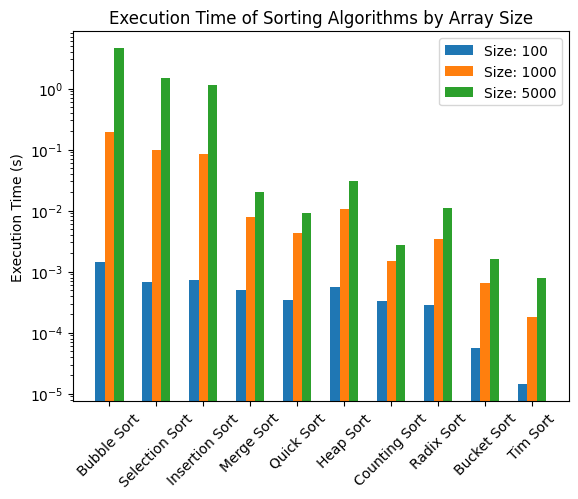

In [5]:

visualize_sorting_algorithms()